# LSTM Model for stock price prediction (Long Term)

Epoch 1/100
34/34 [==============================] - 24s 540ms/step - loss: 0.0488
Epoch 2/100
34/34 [==============================] - 19s 560ms/step - loss: 0.0039
Epoch 3/100
34/34 [==============================] - 19s 539ms/step - loss: 0.0028
Epoch 4/100
34/34 [==============================] - 17s 515ms/step - loss: 0.0023
Epoch 5/100
34/34 [==============================] - 17s 514ms/step - loss: 0.0020
Epoch 6/100
34/34 [==============================] - 21s 625ms/step - loss: 0.0023
Epoch 7/100
34/34 [==============================] - 19s 563ms/step - loss: 0.0018
Epoch 8/100
34/34 [==============================] - 18s 538ms/step - loss: 0.0020
Epoch 9/100
34/34 [==============================] - 22s 663ms/step - loss: 0.0019
Epoch 10/100
34/34 [==============================] - 30s 876ms/step - loss: 0.0026
Epoch 11/100
34/34 [==============================] - 24s 695ms/step - loss: 0.0036
Epoch 12/100
34/34 [==============================] - 22s 646ms/step - loss: 0.0021
E

34/34 [==============================] - 17s 505ms/step - loss: 8.3014e-04
Epoch 98/100
34/34 [==============================] - 17s 498ms/step - loss: 8.2841e-04
Epoch 99/100
34/34 [==============================] - 17s 505ms/step - loss: 9.2696e-04
Epoch 100/100
34/34 [==============================] - 17s 489ms/step - loss: 8.6518e-04


C:\Users\Shemeen62\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 3s 181ms/step


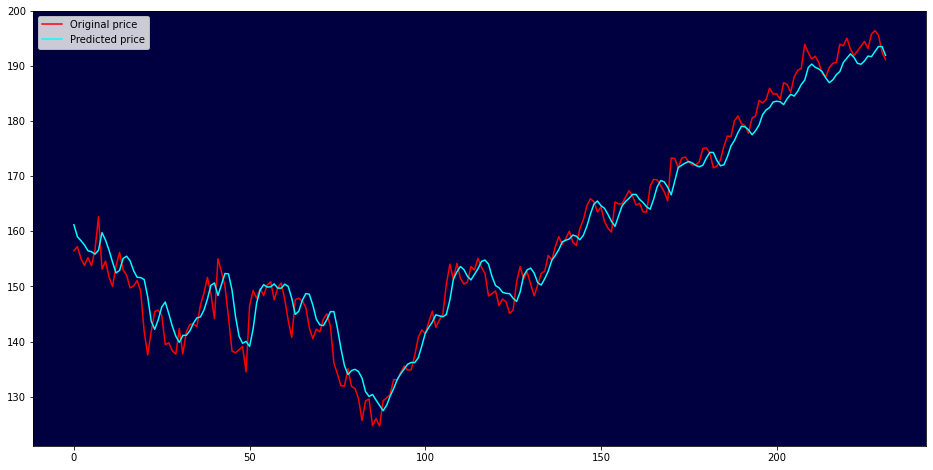

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2018-01-01')

df = df['Close'].values
df = df.reshape(-1, 1)


dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)


def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y


x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


model = Sequential()
model.add(LSTM(units=250, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=250,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=250,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=250))
model.add(Dropout(0.2))
model.add(Dense(units=1))


# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=100, batch_size=32)
model.save(tk+'_stock_prediction.h5')

model = load_model(tk+'_stock_prediction.h5')


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Calculate mean squared error (MSE) and mean absolute error (MAE)
mse = mean_squared_error(y_test_scaled, predictions)
mae = mean_absolute_error(y_test_scaled, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 11.284722585035869
Mean Absolute Error (MAE): 2.6114609816978716


In [8]:
y_test_scaled[100]

array([141.4480896])

In [9]:
predictions[100]

array([141.47601], dtype=float32)